In [1]:
import numpy as np
from pyDOE import lhs
from chaospy import create_sobol_samples
from chaospy import create_halton_samples
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Importing data generated by the h-model of 2d

In [2]:
x1 = np.loadtxt('new_input1.txt')
x2 = np.loadtxt('new_input2.txt')
y1 = np.loadtxt('new_output1.txt')
y2 = np.loadtxt('new_output2.txt')

In [3]:
print(x1.shape)
print(y1.shape)
print(x2.shape)
print(y2.shape)

(8, 746898)
(6, 746898)
(8, 13367016)
(6, 13367016)


process for dataset 1

In dataset 1, the initial position of the deformation is (0,0) for e1 = dl1/l1 and e2 = dl2/l2,

and the step size of the end position varies from 1% to 30%.

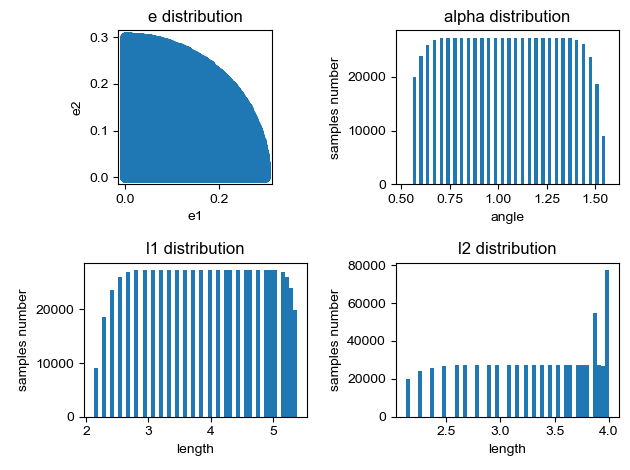

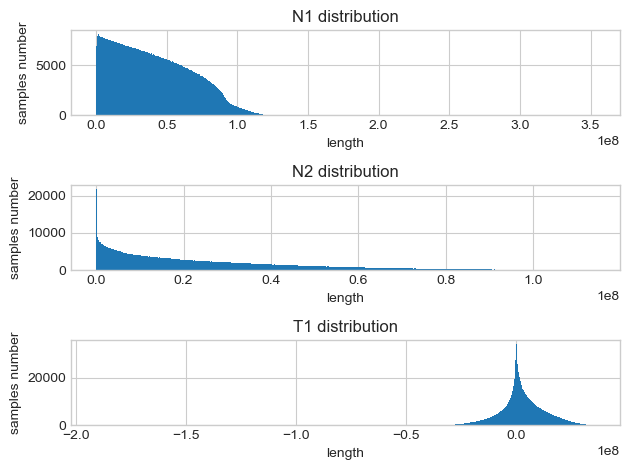

In [4]:
x = x1
y = y1
fig=plt.figure() 

ax1 = fig.add_subplot(2,2,1)
ax1.scatter(x[0],x[1])
plt.title('e distribution')
plt.xlabel('e1')
plt.ylabel('e2')
ax1.set_aspect(1)

ax2 = fig.add_subplot(2,2,2)
ax2.hist(np.array(x[2]),bins = 60,range=(np.pi/6, np.pi/2))
plt.title('alpha distribution')
plt.xlabel('angle')
plt.ylabel('samples number')

ax3 = fig.add_subplot(2,2,3)
ax3.hist(np.array(x[3]),bins = 50)
plt.title('l1 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

ax4 = fig.add_subplot(2,2,4)
ax4.hist(np.array(x[4]),bins = 50)
plt.title('l2 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

plt.tight_layout()
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()


fig=plt.figure() 
ax4 = fig.add_subplot(3,1,1)
ax4.hist(np.array(x[5]),bins = 500)
plt.title('N1 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

ax4 = fig.add_subplot(3,1,2)
ax4.hist(np.array(x[6]),bins = 500)
plt.title('N2 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

ax4 = fig.add_subplot(3,1,3)
ax4.hist(np.array(x[7]),bins = 500)
plt.title('T1 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

plt.tight_layout()
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()

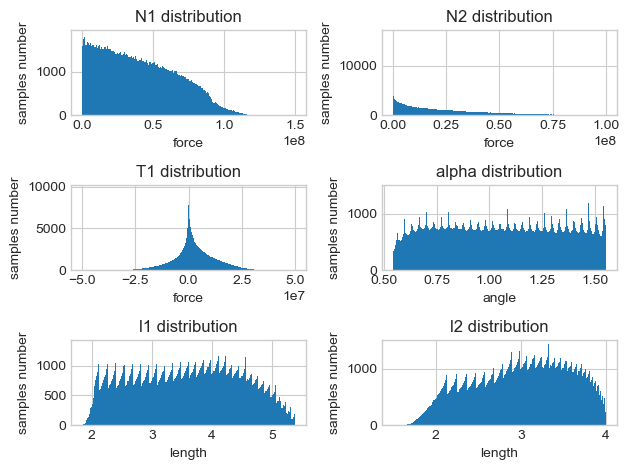

In [5]:
fig=plt.figure() 

ax = fig.add_subplot(3,2,1)
ax.hist(np.array(y[0]),bins = 1000 ,range = (0,1.5e8))
plt.title('N1 distribution')
plt.xlabel('force')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,2)
ax.hist(np.array(y[1]),bins = 1000, range = (0,1e8))
plt.title('N2 distribution')
plt.xlabel('force')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,3)
ax.hist(np.array(y[2]),bins = 1000, range = (-0.5e8,0.5e8))
plt.title('T1 distribution')
plt.xlabel('force')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,4)
ax.hist(np.array(y[3]),bins = 1000)
plt.title('alpha distribution')
plt.xlabel('angle')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,5)
ax.hist(np.array(y[4]),bins = 1000)
plt.title('l1 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,6)
ax.hist(np.array(y[5]),bins = 1000)
plt.title('l2 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

plt.tight_layout()
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()

In [6]:
def identify_outliers(data, lower_threshold, upper_threshold):
    outliers = (data < lower_threshold) | (data > upper_threshold)
    return outliers

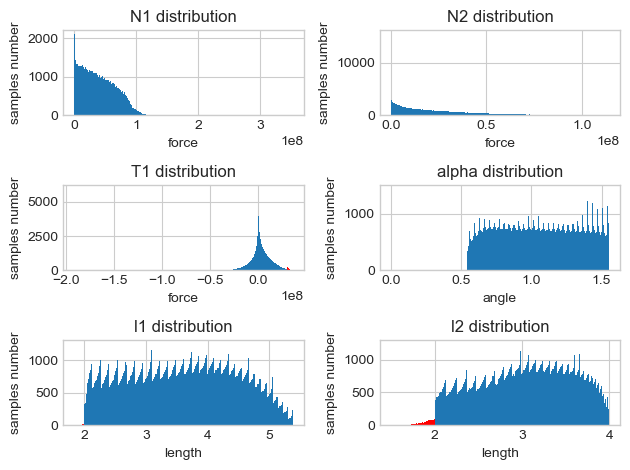

In [7]:
fig = plt.figure()
lower_threshold_l = [0,0,-3e7,np.pi/6,2,2]
upper_threshold_l = [1.2e8,0.8e8,3e7,np.pi/2,6,4]
# Loop through the data and create subplots
for i in range(len(y)):
    ax = fig.add_subplot(3, 2, i+1)
    
    data = np.array(y[i])
    lower_threshold = lower_threshold_l[i]
    upper_threshold = upper_threshold_l[i]
    # Identify outliers
    outliers = identify_outliers(data, lower_threshold, upper_threshold)
    
    # Plot histogram with outliers in a different color
    ax.hist(data[~outliers], bins=1000)
    ax.hist(data[outliers], bins=1000, color='red')
    
    # Set titles and labels
    titles = ['N1 distribution', 'N2 distribution', 'T1 distribution', 'alpha distribution', 'l1 distribution', 'l2 distribution']
    ax.set_title(titles[i])
    ax.set_xlabel('force' if i < 3 else 'angle' if i == 3 else 'length')
    ax.set_ylabel('samples number')
    
plt.tight_layout()
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()

In [8]:
threshold_0 = 2
threshold_1 = 6
l1_outliers = (y[4] < threshold_0) | (y[4] > threshold_1)
x = x[:,~l1_outliers]
y = y[:,~l1_outliers]

threshold_0 = 2
threshold_1 = 4
l2_outliers = (y[5] < threshold_0) | (y[5] > threshold_1)
x = x[:,~l2_outliers]
y = y[:,~l2_outliers]

threshold_0 = -np.pi/3
threshold_1 = np.pi/3
l3_outliers = (y[3] - x[2] < threshold_0) | (y[3] - x[2] > threshold_1)
x = x[:,~l3_outliers]
y = y[:,~l3_outliers]

In [9]:
print(x.shape)
print(y.shape)

(8, 714230)
(6, 714230)


In [10]:
x1 = x
y1 = y

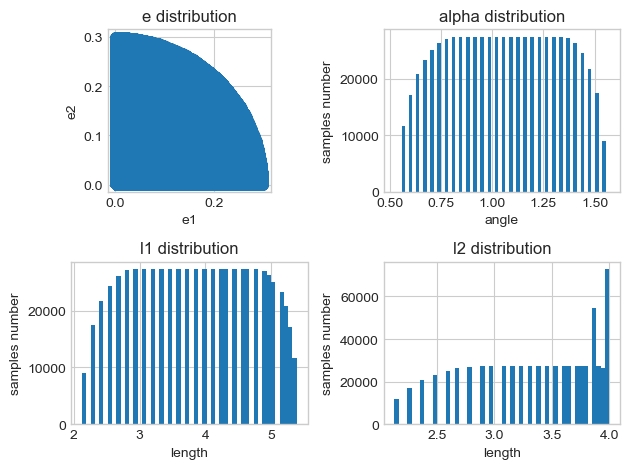

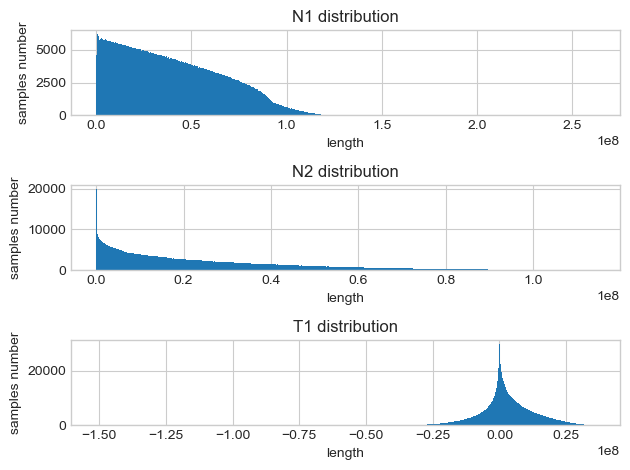

In [11]:
fig=plt.figure() 

ax1 = fig.add_subplot(2,2,1)
ax1.scatter(x[0],x[1])
plt.title('e distribution')
plt.xlabel('e1')
plt.ylabel('e2')
ax1.set_aspect(1)

ax2 = fig.add_subplot(2,2,2)
ax2.hist(np.array(x[2]),bins = 60,range=(np.pi/6, np.pi/2))
plt.title('alpha distribution')
plt.xlabel('angle')
plt.ylabel('samples number')

ax3 = fig.add_subplot(2,2,3)
ax3.hist(np.array(x[3]),bins = 50)
plt.title('l1 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

ax4 = fig.add_subplot(2,2,4)
ax4.hist(np.array(x[4]),bins = 50)
plt.title('l2 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

plt.tight_layout()
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()


fig=plt.figure() 
ax4 = fig.add_subplot(3,1,1)
ax4.hist(np.array(x[5]),bins = 500)
plt.title('N1 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

ax4 = fig.add_subplot(3,1,2)
ax4.hist(np.array(x[6]),bins = 500)
plt.title('N2 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

ax4 = fig.add_subplot(3,1,3)
ax4.hist(np.array(x[7]),bins = 500)
plt.title('T1 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

plt.tight_layout()
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()

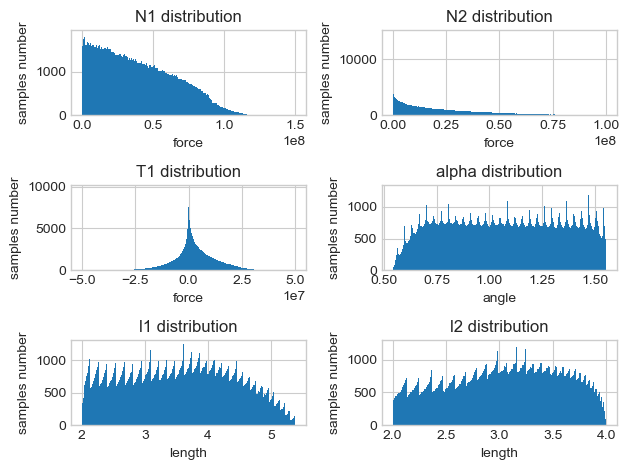

In [12]:
fig=plt.figure() 

ax = fig.add_subplot(3,2,1)
ax.hist(np.array(y[0]),bins = 1000 ,range = (0,1.5e8))
plt.title('N1 distribution')
plt.xlabel('force')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,2)
ax.hist(np.array(y[1]),bins = 1000, range = (0,1e8))
plt.title('N2 distribution')
plt.xlabel('force')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,3)
ax.hist(np.array(y[2]),bins = 1000, range = (-0.5e8,0.5e8))
plt.title('T1 distribution')
plt.xlabel('force')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,4)
ax.hist(np.array(y[3]),bins = 1000)
plt.title('alpha distribution')
plt.xlabel('angle')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,5)
ax.hist(np.array(y[4]),bins = 1000)
plt.title('l1 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,6)
ax.hist(np.array(y[5]),bins = 1000)
plt.title('l2 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

plt.tight_layout()
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()

process for dataset 2

In dataset 2, the deformation is initially distributed uniformly within the sector, 

and the deformation step size is constant to be 1%.

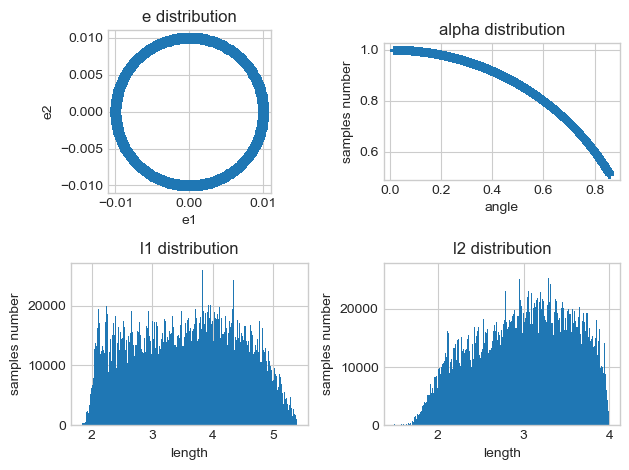

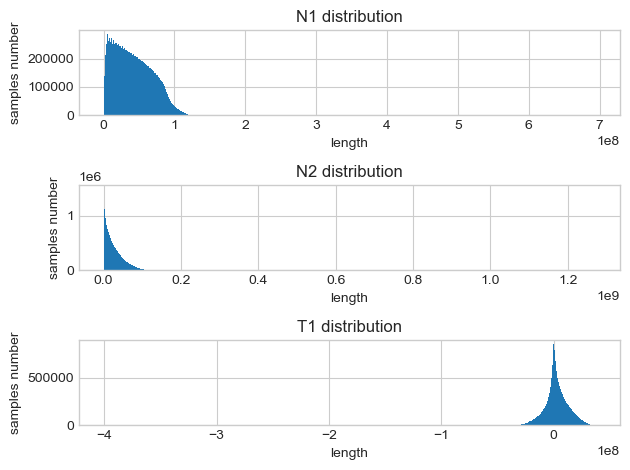

In [13]:
x = x2
y = y2

fig=plt.figure() 

ax = fig.add_subplot(2,2,1)
ax.scatter(x[0],x[1])
plt.title('e distribution')
plt.xlabel('e1')
plt.ylabel('e2')
ax.set_aspect(1)

ax = fig.add_subplot(2,2,2)
ang_l = np.array(x[2])
plt_x = np.cos(ang_l)
plt_y = np.sin(ang_l)
ax.plot(plt_x,plt_y,linestyle='None',marker='+')
plt.title('alpha distribution')
plt.xlabel('angle')
plt.ylabel('samples number')
ax.set_aspect(1)

ax = fig.add_subplot(2,2,3)
ax.hist(np.array(x[3]),bins = 1000)
plt.title('l1 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

ax = fig.add_subplot(2,2,4)
ax.hist(np.array(x[4]),bins = 1000)
plt.title('l2 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

plt.tight_layout()
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()

fig=plt.figure() 
ax4 = fig.add_subplot(3,1,1)
ax4.hist(np.array(x[5]),bins = 500)
plt.title('N1 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

ax4 = fig.add_subplot(3,1,2)
ax4.hist(np.array(x[6]),bins = 500)
plt.title('N2 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

ax4 = fig.add_subplot(3,1,3)
ax4.hist(np.array(x[7]),bins = 500)
plt.title('T1 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

plt.tight_layout()
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()

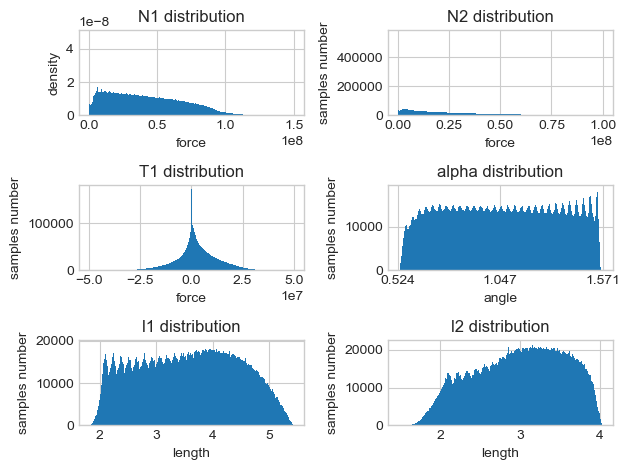

In [14]:
fig=plt.figure() 

ax = fig.add_subplot(3,2,1)
ax.hist(np.array(y[0]),bins = 1000, density = True,range = (0,1.5e8))
plt.title('N1 distribution')
plt.xlabel('force')
plt.ylabel('density')

ax = fig.add_subplot(3,2,2)
ax.hist(np.array(y[1]),bins = 1000,range = (0,1e8))
plt.title('N2 distribution')
plt.xlabel('force')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,3)
ax.hist(np.array(y[2]),bins = 1000,range = (-0.5e8,0.5e8))
plt.title('T1 distribution')
plt.xlabel('force')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,4)
ax.hist(np.array(y[3]),bins = 1000)
plt.title('alpha distribution')
plt.xlabel('angle')
plt.ylabel('samples number')
x_ticks = [np.pi/6, np.pi/3,np.pi/2]
plt.xticks(x_ticks)

ax = fig.add_subplot(3,2,5)
ax.hist(np.array(y[4]),bins = 1000)
plt.title('l1 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,6)
ax.hist(np.array(y[5]),bins = 1000)
plt.title('l2 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

plt.tight_layout()
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()

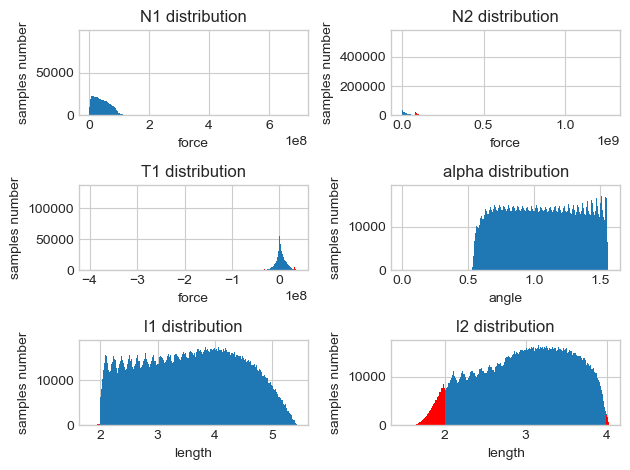

In [15]:
fig = plt.figure()
lower_threshold_l = [0,0,-3e7,np.pi/6,2,2]
upper_threshold_l = [1.2e8,0.8e8,3e7,np.pi/2,6,4]
# Loop through the data and create subplots
for i in range(len(y)):
    ax = fig.add_subplot(3, 2, i+1)
    
    data = np.array(y[i])
    lower_threshold = lower_threshold_l[i]
    upper_threshold = upper_threshold_l[i]
    # Identify outliers
    outliers = identify_outliers(data, lower_threshold, upper_threshold)
    
    # Plot histogram with outliers in a different color
    ax.hist(data[~outliers], bins=1000)
    ax.hist(data[outliers], bins=1000, color='red')
    
    # Set titles and labels
    titles = ['N1 distribution', 'N2 distribution', 'T1 distribution', 'alpha distribution', 'l1 distribution', 'l2 distribution']
    ax.set_title(titles[i])
    ax.set_xlabel('force' if i < 3 else 'angle' if i == 3 else 'length')
    ax.set_ylabel('samples number')
    
plt.tight_layout()
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()

In [16]:
threshold_0 = 2
threshold_1 = 6
l1_outliers = (y[4] < threshold_0) | (y[4] > threshold_1)
x = x[:,~l1_outliers]
y = y[:,~l1_outliers]

threshold_0 = 2
threshold_1 = 4
l2_outliers = (y[5] < threshold_0) | (y[5] > threshold_1)
x = x[:,~l2_outliers]
y = y[:,~l2_outliers]

threshold_0 = -np.pi/3
threshold_1 = np.pi/3
l3_outliers = (y[3] - x[2] < threshold_0) | (y[3] - x[2] > threshold_1)
x = x[:,~l3_outliers]
y = y[:,~l3_outliers]

In [17]:
print(x.shape)
print(y.shape)

(8, 12745983)
(6, 12745983)


In [18]:
x2 = x
y2 = y

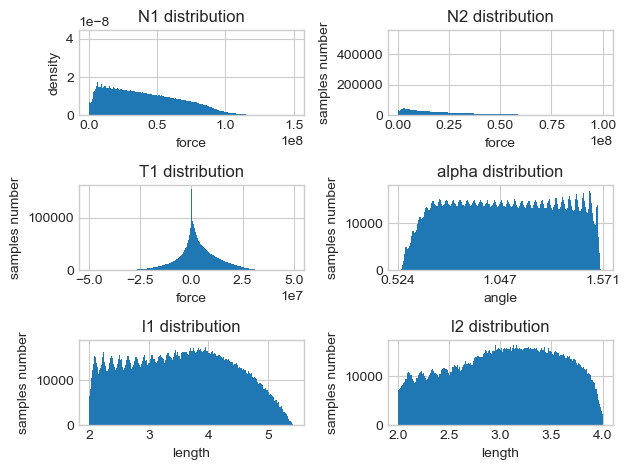

In [19]:
fig=plt.figure() 

ax = fig.add_subplot(3,2,1)
ax.hist(np.array(y[0]),bins = 1000, density = True,range = (0,1.5e8))
plt.title('N1 distribution')
plt.xlabel('force')
plt.ylabel('density')

ax = fig.add_subplot(3,2,2)
ax.hist(np.array(y[1]),bins = 1000,range = (0,1e8))
plt.title('N2 distribution')
plt.xlabel('force')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,3)
ax.hist(np.array(y[2]),bins = 1000,range = (-0.5e8,0.5e8))
plt.title('T1 distribution')
plt.xlabel('force')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,4)
ax.hist(np.array(y[3]),bins = 1000)
plt.title('alpha distribution')
plt.xlabel('angle')
plt.ylabel('samples number')
x_ticks = [np.pi/6, np.pi/3,np.pi/2]
plt.xticks(x_ticks)

ax = fig.add_subplot(3,2,5)
ax.hist(np.array(y[4]),bins = 1000)
plt.title('l1 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

ax = fig.add_subplot(3,2,6)
ax.hist(np.array(y[5]),bins = 1000)
plt.title('l2 distribution')
plt.xlabel('length')
plt.ylabel('samples number')

plt.tight_layout()
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()

save the data

In [20]:
np.savetxt('Modified_new_input1.txt',x1)
np.savetxt('Modified_new_output1.txt',y1)
np.savetxt('Modified_new_input2.txt',x2)
np.savetxt('Modified_new_output2.txt',y2)

remove l1 l2 in Y

In [21]:
x1 = np.loadtxt('Modified_new_input1.txt')
x2 = np.loadtxt('Modified_new_input2.txt')
y1 = np.loadtxt('Modified_new_output1.txt')
y2 = np.loadtxt('Modified_new_output2.txt')

In [22]:
_,n1 = x1.shape
_,n2 = x2.shape
X = np.concatenate((x1.T, x2.T), axis=0)
Y = np.concatenate((y1.T, y2.T), axis=0)

In [23]:
print(X.shape)
print(Y.shape)

(13460213, 8)
(13460213, 6)


In [24]:
Y = Y[:,:4]

In [25]:
print(Y.shape)

(13460213, 4)


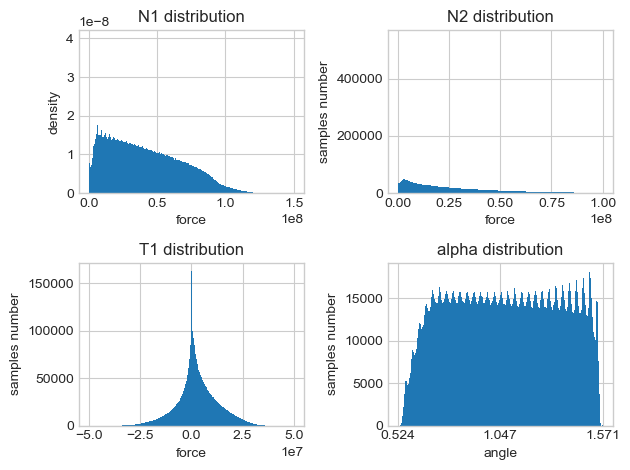

In [26]:
y = Y.T
fig=plt.figure() 

ax = fig.add_subplot(2,2,1)
ax.hist(np.array(y[0]),bins = 1000, density = True,range = (0,1.5e8))
plt.title('N1 distribution')
plt.xlabel('force')
plt.ylabel('density')

ax = fig.add_subplot(2,2,2)
ax.hist(np.array(y[1]),bins = 1000,range = (0,1e8))
plt.title('N2 distribution')
plt.xlabel('force')
plt.ylabel('samples number')

ax = fig.add_subplot(2,2,3)
ax.hist(np.array(y[2]),bins = 1000,range = (-0.5e8,0.5e8))
plt.title('T1 distribution')
plt.xlabel('force')
plt.ylabel('samples number')

ax = fig.add_subplot(2,2,4)
ax.hist(np.array(y[3]),bins = 1000)
plt.title('alpha distribution')
plt.xlabel('angle')
plt.ylabel('samples number')
x_ticks = [np.pi/6, np.pi/3,np.pi/2]
plt.xticks(x_ticks)

plt.tight_layout()
plt.style.use("seaborn-v0_8-whitegrid")
plt.show()

modify the data, devide by radius and stiffness

In [32]:
kn = 2.0e8 
kt = 0.5 * kn
radius = 1

vx = np.array([1,1,radius,radius,1,kn,kn,kt])
vy = np.array([kn,kn,kt,1])

In [33]:
updated_X = X / vx
updated_Y = Y / vy

In [43]:
x1 = updated_X[:n1,:]
x2 = updated_X[n1:,:]
y1 = updated_Y[:n1,:]
y2 = updated_Y[n1:,:]
print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)

print(np.max(x1, axis=0))
print(np.max(x2, axis=0))
print(np.max(y1, axis=0))
print(np.max(y2, axis=0))

(714230, 8)
(12745983, 8)
(714230, 4)
(12745983, 4)
[0.3        0.3        1.5393804  5.38477266 3.99802624 1.31022324
 0.57057459 0.35821538]
[0.01       0.01       1.55329212 5.38477266 3.99802624 3.10008882
 0.58896301 0.37285573]
[1.31022324 0.57057459 0.35821538 1.55334186]
[3.10008882 0.58896301 0.37285573 1.57076004]


In [44]:
np.savetxt('updated_new_input1.txt',x1)
np.savetxt('updated_new_input2.txt',x2)
np.savetxt('updated_new_output1.txt',y1)
np.savetxt('updated_new_output2.txt',y2)

load data and seperate the training datasets

In [47]:
x1 = np.loadtxt('updated_new_input1.txt')
x2 = np.loadtxt('updated_new_input2.txt')
y1 = np.loadtxt('updated_new_output1.txt')
y2 = np.loadtxt('updated_new_output2.txt')

In [49]:
print(x1.shape)
print(y1.shape)
print(x2.shape)
print(y2.shape)

(714230, 8)
(714230, 4)
(12745983, 8)
(12745983, 4)


In [50]:
n1 = x1.shape[0]
n2 = x2.shape[0]

In [51]:
def choose_random(n,m,x,y):
    
    indices = np.random.choice(n, size=m, replace=False)

    # Select the corresponding rows from the dataset
    selected_x = x[indices]
    selected_y = y[indices]
      
    return [selected_x,selected_y]

In [52]:
def choose_grid(n, m, x, y):
    indices = np.linspace(0, n-2, m).astype(int)

    # Select the corresponding rows from the dataset
    selected_x = x[indices]
    selected_y = y[indices]
      
    return selected_x, selected_y

In [53]:
def choose_LHS(n ,m, x, y, m_grid = 1):
    
    d = 5
#     l_index = [ [] for _ in range(n)]
    l_macrogrid = [[[[[[] for d5 in range(m)] 
                        for d4 in range(m)] 
                       for d3 in range(m)] 
                      for d2 in range(m)] 
                    for d1 in range(m) ]
    l_max = []
    l_min = []
    
    for i in range(d):
        l_x = x[:,i]
        l_max.append(np.max(l_x))
        l_min.append(np.min(l_x))
        
    for i in range(n):
        l_index=[]
        for j in range(d):
            threshold = (l_max[j] - l_min[j]) / m 
            index = np.floor((x[i][j] - l_min[j]) / threshold)
            index = int(index)
            if index >= m:
                index = m - 1 #avoid m change it to m-1
            l_index.append(index)
        d1, d2, d3, d4, d5 = l_index
        l_macrogrid[d1][d2][d3][d4][d5].append(i)
    
#     print(l_min)
#     print(l_max)
#     print(l_index)
#     print(l_macrogrid[0][0][0][0][0])
    
    x_select = []
    y_select = []
    for d1 in range(m):
        for d2 in range(m):
            for d3 in range(m):
                for d4 in range(m):
                    for d5 in range(m):
                        l_id = l_macrogrid[d1][d2][d3][d4][d5]
                        if len(l_id) == 0:
                            continue
                        if m_grid < len(l_id):
                            id_chosen = random.sample(l_id, m_grid)
                        else:
                            id_chosen = l_id
                        for id in id_chosen:
                            x_select.append(x[id])
                            y_select.append(y[id])
                        
                        
    return [x_select, y_select]
                        

In [54]:
def split_grid(n,m,x,y):
    indices = np.linspace(0, n-2, m).astype(int)
    
    x_train = np.delete(x, indices, axis=0)
    x_test = x[indices]
    y_train = np.delete(y, indices, axis=0)
    y_test = y[indices]
    
    return [x_train, x_test, y_train, y_test]

6k train 4k test for 2nd set only

In [55]:
m = 10000
m_test = 4000
selected_x,selected_y = choose_random(n2,m,x2,y2)
x_train, x_test, y_train, y_test = split_grid(m, m_test,selected_x,selected_y)
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
np.savetxt('new_6k_x_train_2nd_set_only_Random',x_train)
np.savetxt('new_6k_x_test_2nd_set_only_Random',x_test)
np.savetxt('new_6k_y_train_2nd_set_only_Random',y_train)
np.savetxt('new_6k_y_test_2nd_set_only_Random',y_test)

selected_x,selected_y = choose_grid(n2,m,x2,y2)
x_train, x_test, y_train, y_test = split_grid(m, m_test,selected_x,selected_y)
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
np.savetxt('new_6k_x_train_2nd_set_only_Grid',x_train)
np.savetxt('new_6k_x_test_2nd_set_only_Grid',x_test)
np.savetxt('new_6k_y_train_2nd_set_only_Grid',y_train)
np.savetxt('new_6k_y_test_2nd_set_only_Grid',y_test)

600k

In [57]:
m = 1000000
m_test = 400000
selected_x,selected_y = choose_random(n2,m,x2,y2)
x_train, x_test, y_train, y_test = split_grid(m, m_test,selected_x,selected_y)
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
np.savetxt('new_600k_x_train_2nd_set_only_Random',x_train)
np.savetxt('new_600k_x_test_2nd_set_only_Random',x_test)
np.savetxt('new_600k_y_train_2nd_set_only_Random',y_train)
np.savetxt('new_600k_y_test_2nd_set_only_Random',y_test)

selected_x,selected_y = choose_grid(n2,m,x2,y2)
x_train, x_test, y_train, y_test = split_grid(m, m_test,selected_x,selected_y)
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
np.savetxt('new_600k_x_train_2nd_set_only_Grid',x_train)
np.savetxt('new_600k_x_test_2nd_set_only_Grid',x_test)
np.savetxt('new_600k_y_train_2nd_set_only_Grid',y_train)
np.savetxt('new_600k_y_test_2nd_set_only_Grid',y_test)